In [107]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [108]:
df=pd.read_csv('placement.csv')
df.sample(5)

,cgpa,placement_exam_marks,placed
120,6.99,46.0,1
879,6.83,31.0,0
697,7.23,49.0,1
29,6.51,15.0,1
218,6.62,52.0,0


Text(0.5, 0, 'placement_exam_marks')

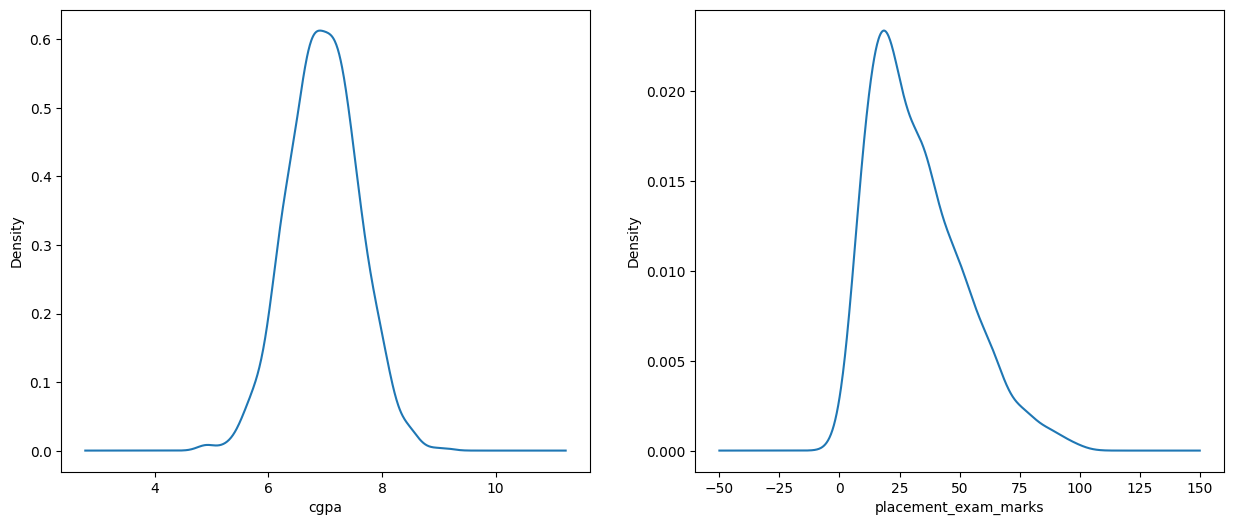

In [109]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,6))
df['cgpa'].plot(kind='kde',ax=ax1)
ax1.set_xlabel('cgpa')
df['placement_exam_marks'].plot(kind='kde',ax=ax2)
ax2.set_xlabel('placement_exam_marks')

In [ ]:
df['cgpa'].skew()
# almost normal distribbution h toh kuch nhi krenge

-0.014529938929314918

<Axes: ylabel='cgpa'>

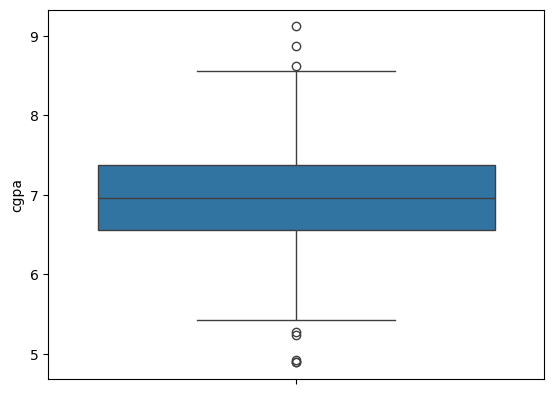

In [111]:
sns.boxplot(df['cgpa'])

<Axes: ylabel='placement_exam_marks'>

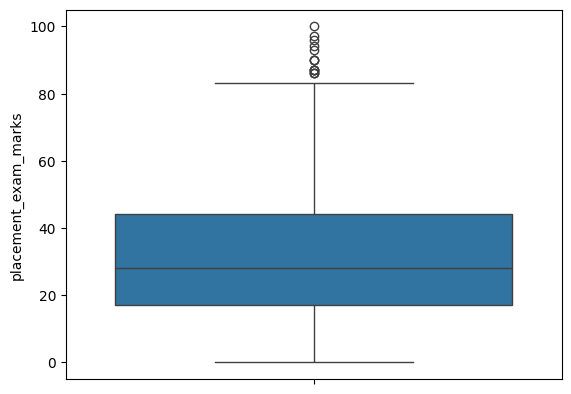

In [110]:
sns.boxplot(df['placement_exam_marks'])
# skwed h mtlb outliers h

In [87]:
df['placement_exam_marks'].skew()

0.8356419499466834

In [88]:
# to find outliers
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


In [89]:
q1=df['placement_exam_marks'].quantile(0.25)
q3=df['placement_exam_marks'].quantile(0.75)
q1,q3
iqr=q3-q1
iqr

27.0

In [94]:
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr
lower_bound,upper_bound

(-23.5, 84.5)

In [96]:
df[df['placement_exam_marks'] > upper_bound]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [97]:
df[df['placement_exam_marks'] < lower_bound]

,cgpa,placement_exam_marks,placed


In [100]:
# trimming
new_df=df[df['placement_exam_marks']<upper_bound]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [101]:
new_df.shape

(985, 3)

C:\Users\HP\AppData\Local\Temp\ipykernel_3844\3691338288.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
C:\Users\HP\AppData\Local\Temp\ipykernel_3844\3691338288.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['placement_exam_marks'])


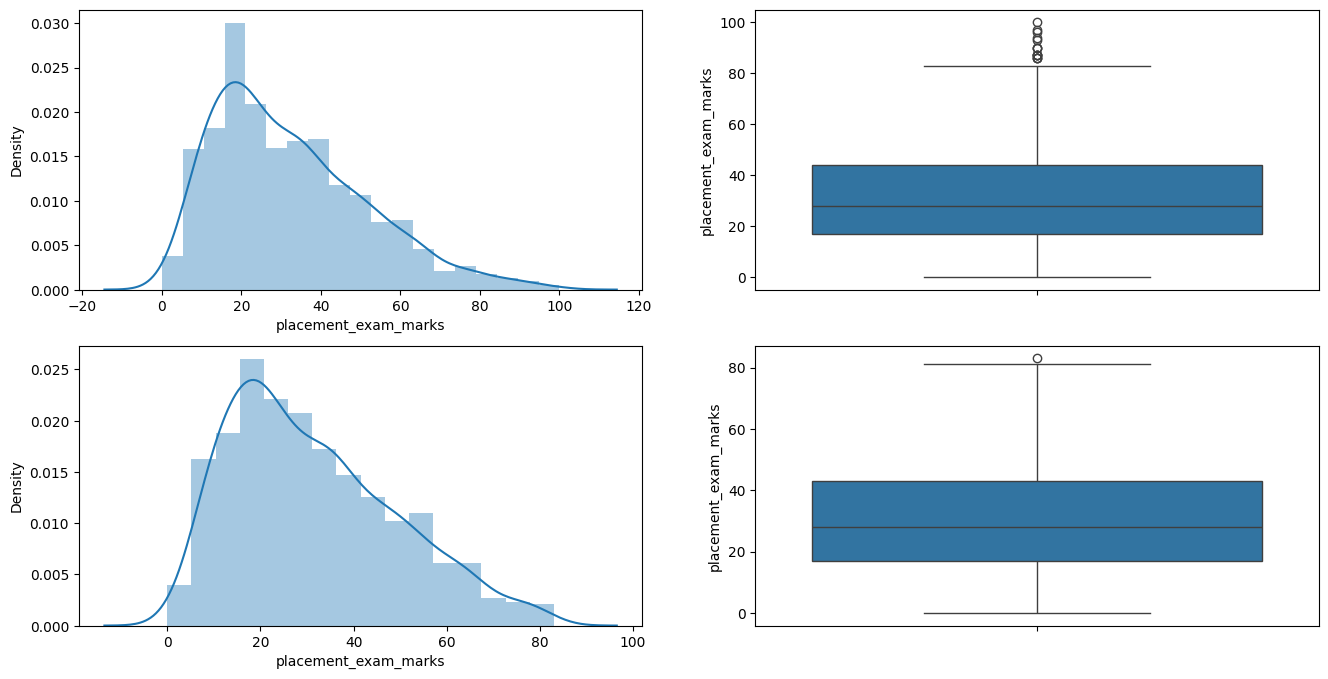

In [102]:

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(new_df['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_df['placement_exam_marks'])

plt.show()

In [112]:
# capping
new_df_cap = df.copy()
new_df_cap['placement_exam_marks'] = np.where(
    new_df_cap['placement_exam_marks'] > upper_bound,
    upper_bound,
    np.where(
        new_df_cap['placement_exam_marks'] < lower_bound,
        lower_bound,
        new_df_cap['placement_exam_marks']
    )
)

In [105]:

# np.where(condtion,true,false)
new_df_cap.shape

(1000, 3)

C:\Users\HP\AppData\Local\Temp\ipykernel_3844\2127205041.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
C:\Users\HP\AppData\Local\Temp\ipykernel_3844\2127205041.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_cap['placement_exam_marks'])


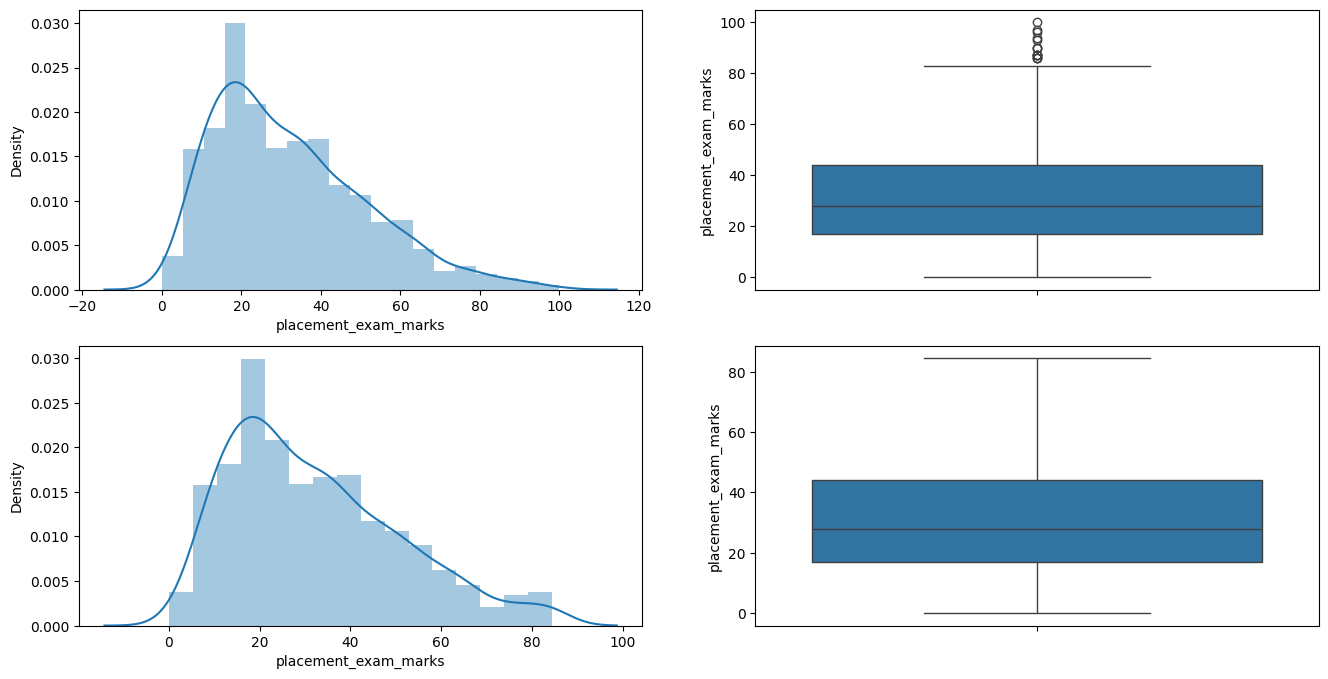

In [106]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(new_df_cap['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['placement_exam_marks'])

plt.show()